# Pengolahan Citra Radiografi Digital

***Rio Agustian Gilang Fernando, 4211420004, Fisika***

***FMIPA Universitas Negeri Semarang***
    


## 1. Menampilkan Citra 

<p style="text-align:justify;">
Citra yang digunakan merupakan hasil x-ray telapak tangan manusia. Citra berikut memiliki piksel 1080 $\times$ 1080. Citra yang disimpan dalam komputer akan dibaca dengan bantuan library OpenCV dan matplotlib.pyplot. Dari citra, dapat dilihat kalau tidak ada tulang yang mengalami kelainan seperti fraktur.
    </p>
    

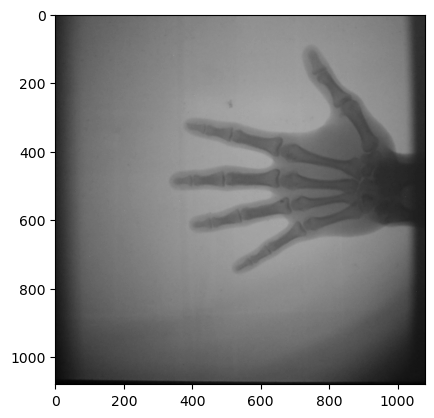

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Path dari file citra
img = r"C:\Users\Rio Agustian\Documents\S1 FISIKA\INSTRUMENTASI_MEDIS\hand.png"

# Membaca citra dalam format grayscale
img = cv.imread(img, 0)

# Menampilkan citra
plt.imshow(img, cmap="gray")
plt.show()

## 2. Menampilkan Histogram Citra

<p style="text-align:justify;">
Histogram citra adalah representasi visual dari distribusi intensitas piksel dalam citra. Dengan meninjau histogram, sifat citra seperi kontras dan kecerahan dapat diketahui. Histogram berikut menampilkan distribusi dari intensitas piksel, dari piksel dengan intensitas 0 sampai dengan 255. Dari histogram, dapat dilihat kalau citra yang sedang diolah adalah citra yang cenderung gelap.
    </p>

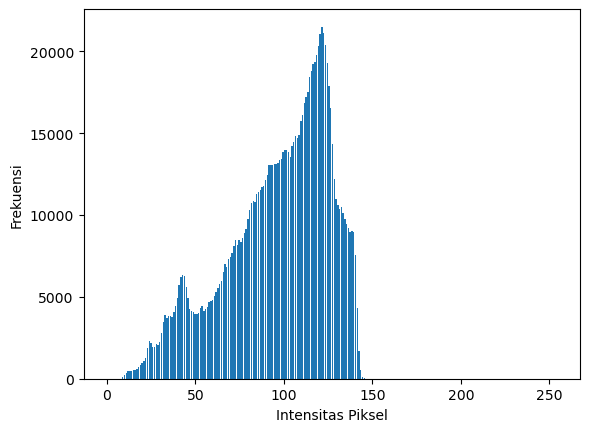

In [2]:
# Menghitung histogram dengan Numpy
hist, bins = np.histogram(img, bins=256, range=[0, 255])

# Histogram
plt.bar(bins[:-1], hist)
plt.ylabel("Frekuensi")
plt.xlabel("Intensitas Piksel")
plt.show()

## 3. Histogram Strecthing

<p style="text-align:justify;">
Histogram stretching adalah salah satu teknik pengolahan citra digital yang dilakukan dengan operasi titik yang bertujuan untuk memperbaiki kontras gambar dengan menyesuaikan rentang nilai intensitas piksel. Pada citra berikut, nilai piksel minimum diubah menjadi 150 dan nilai piksel maksimum diubah menjadi 250. Dapat dilihat kalau histogram citra menjadi berubah bentuk sesuai variabel yang diubah.
</p>

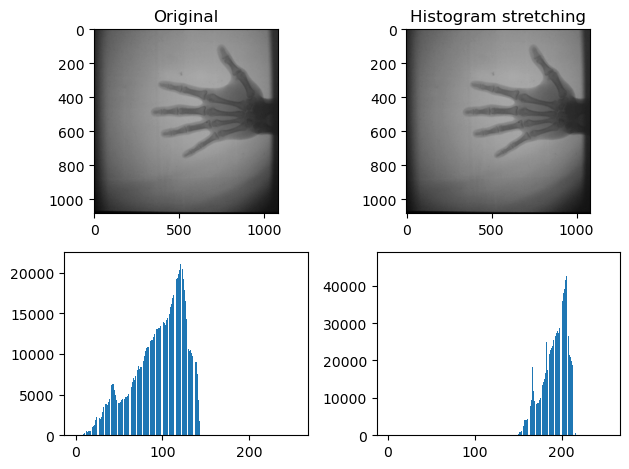

In [3]:
img_norm = cv.normalize(img, None, 150, 250, cv.NORM_MINMAX)

hist0, bins0 = np.histogram(img     , bins=256, range=[0, 255])
hist1, bins1 = np.histogram(img_norm, bins=256, range=[0, 255])

plt.subplot(221)
plt.imshow(img     , cmap="gray")
plt.title("Original")

plt.subplot(222)
plt.imshow(img_norm, cmap="gray")
plt.title("Histogram stretching")

plt.subplot(223)
plt.bar(bins0[:-1], hist0)

plt.subplot(224)
plt.bar(bins1[:-1], hist1)

plt.tight_layout()
plt.show()

## 4. Brightness Operation
<p style="text-align:justify;">
Operasi aritmatika penjumlah atau pengurangan adalah operasi untuk mengatur kecerahan citra. Misalnya, untuk meningkatkan kecerahan citra, setiap piksel dapat ditambahkan dengan nilai konstanta tertentu. Untuk mengurangi kecerahan, setiap piksel dapat dikurangi dengan konstanta tertentu.
</p>

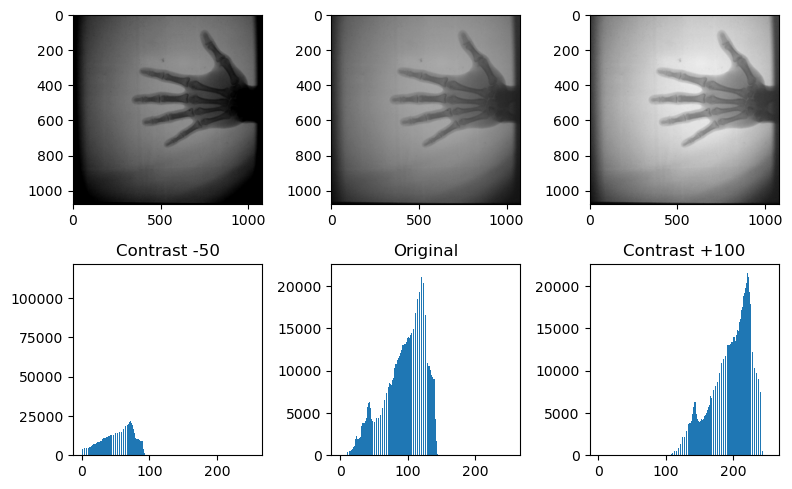

In [4]:
img_r = cv.add(img,  100) # Histogram digeser ke kanan
img_l = cv.add(img, -50) # Histogram digeser ke kiri

hist0, bins0 = np.histogram(img  , bins=256, range=[0, 255])
hist1, bins1 = np.histogram(img_r, bins=256, range=[0, 255])
hist2, bins2 = np.histogram(img_l, bins=256, range=[0, 255])

plt.figure(figsize=(8, 5))

plt.subplot(232)
plt.imshow(img, cmap="gray")

plt.subplot(235)
plt.bar(bins0[:-1], hist0)
plt.title("Original")

plt.subplot(233)
plt.imshow(img_r, cmap="gray")

plt.subplot(236)
plt.bar(bins1[:-1], hist1)
plt.title("Contrast +100")

plt.subplot(231)
plt.imshow(img_l, cmap="gray")

plt.subplot(234)
plt.bar(bins2[:-1], hist2)
plt.title("Contrast -50")

plt.tight_layout()
plt.show()

## 5. Histogram Equalization
<p style="text-align: justify;">
<i>Histogram equalization</i> adalah teknik pengolahan citra yang bertujuan untuk meningkatkan kontras gambar dengan menyebar ulang distribusi piksel ke seluruh rentang intensitas gambar. Tampak pada histogram citra setelah dilakukan <i>histogram equalization</i> distribusi intensitas piksel lebih merata daripada sebelumnya.
</p>

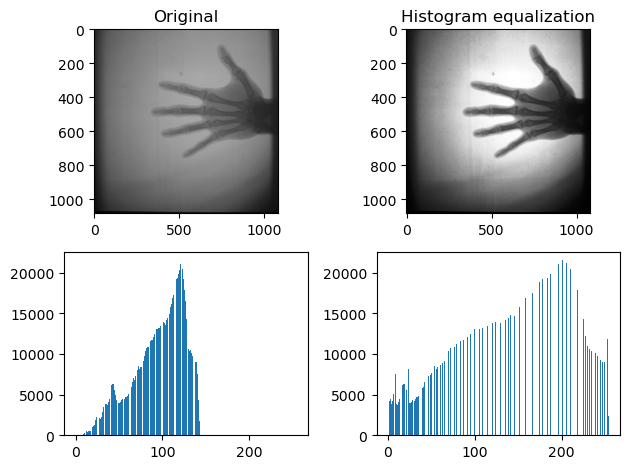

In [5]:
img_eq = cv.equalizeHist(img)

hist0, bins0 = np.histogram(img   , bins=256, range=[0, 255])
hist1, bins1 = np.histogram(img_eq, bins=256, range=[0, 255])

plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.title("Original")

plt.subplot(223)
plt.bar(bins0[:-1], hist0)

plt.subplot(222)
plt.imshow(img_eq, cmap="gray")
plt.title("Histogram equalization")

plt.subplot(224)
plt.bar(bins1[:-1], hist1)

plt.tight_layout()
plt.show()

## 6. Thresholding

<p style="text-align:justify;">
<i>Thresholding</i> adalah teknik pengolahan citra yang digunakan untuk mengubah citra menjadi citra biner dengan membagi piksel-piksel menjadi dua kelas, yaitu piksel yang bernilai di atas atau di bawah suatu ambang batas tertentu. Misal, pada kode berikut, piksel akan diubah menjadi 0 apabila nilainya kurang dari sama dengan 100, dan diubah menjadi 255 apabila nilainya lebih dari 100. 
</p>

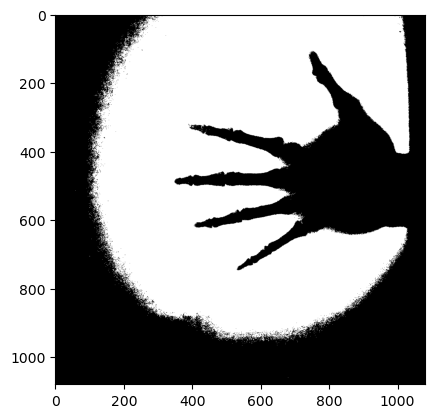

In [6]:
ret, thresh = cv.threshold(img, 100, 255, cv.THRESH_BINARY)

plt.imshow(thresh, cmap="gray")
plt.show()